In [7]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
dataset = pd.read_csv("winequality-red(modified).csv")

In [13]:
dataset.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,density
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,0.9978
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5,0.9968
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5,0.9970


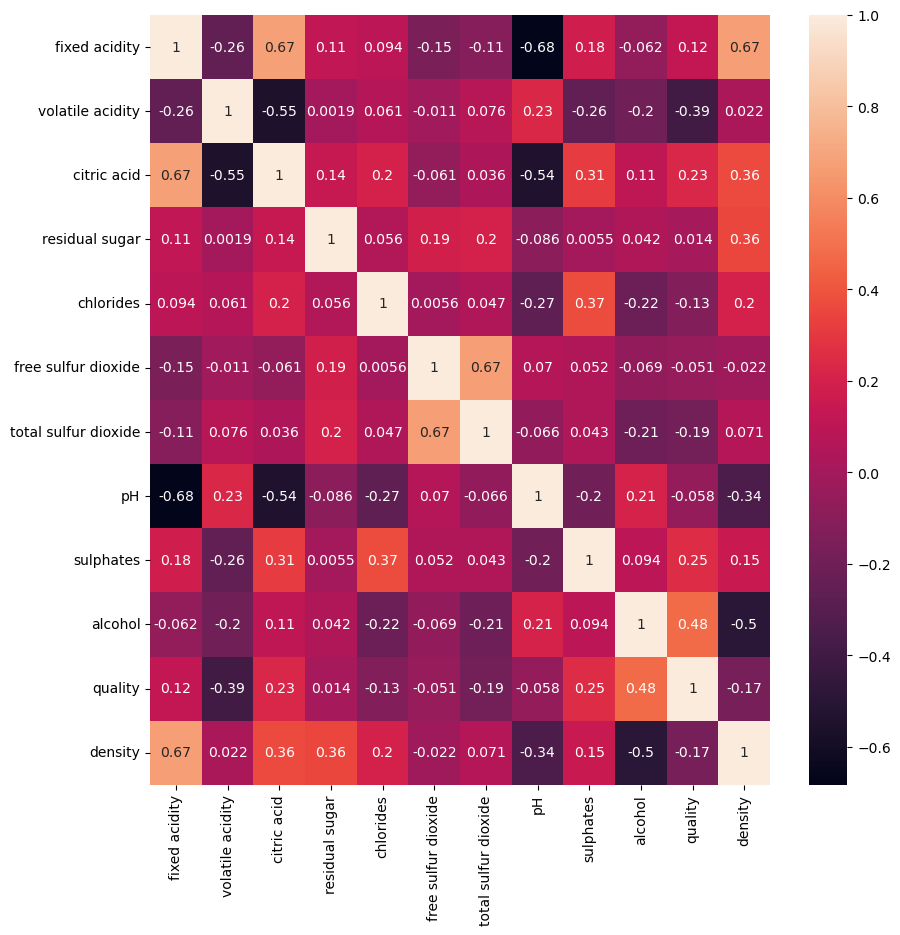

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [21]:
x =dataset.iloc[:,:-1] 
y =dataset["density"]

In [27]:
sc =StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,1.677400,0.305990,-0.209308,-0.787823


In [33]:
x_train, x_test, y_train, y_test =train_test_split(x,y,train_size=0.2,random_state=42)


#LinearRegression


In [94]:
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge

In [100]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error
import numpy as np

In [43]:
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [45]:
lr.score(x_test,y_test)

0.8372686270686448

In [47]:
lr.coef_


array([ 1.55136440e-03,  1.62309988e-04,  1.29162327e-04,  6.48796698e-04,
        1.07562020e-04, -1.24718523e-04,  1.04886460e-04,  7.59101274e-04,
        1.83643876e-04, -9.61452272e-04, -2.10191713e-05])

In [110]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

5.926708164636773e-07
0.0005770907152606935
0.0007698511651375721


0.0005770907152606935

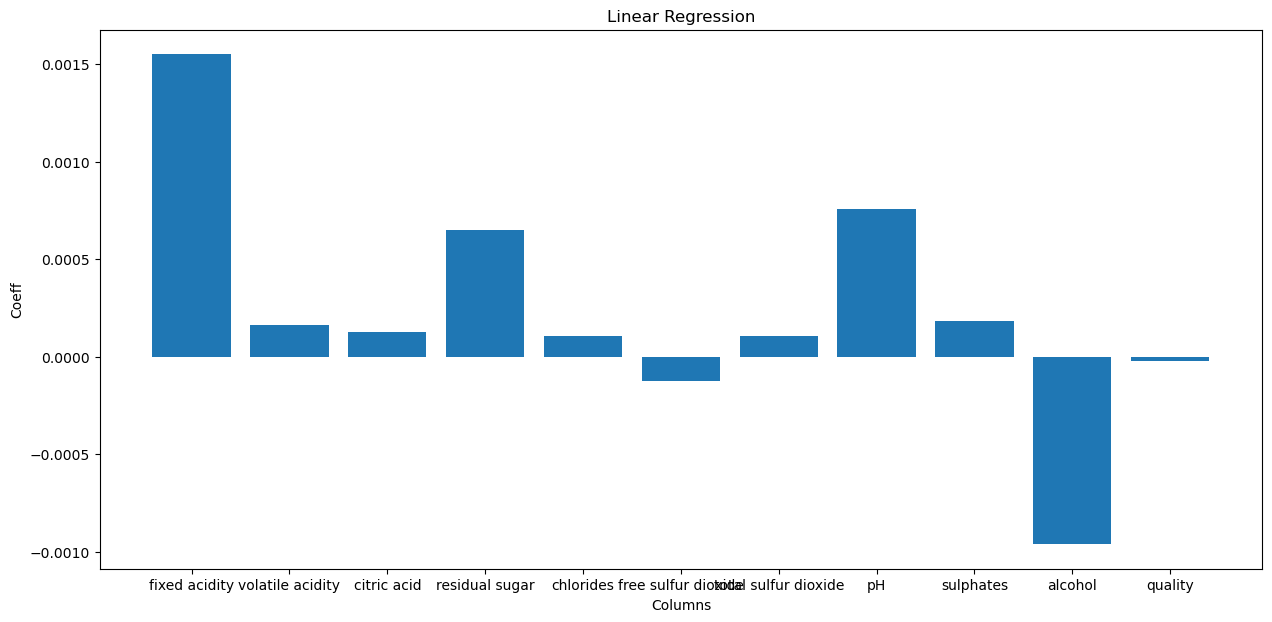

In [59]:
plt.figure(figsize=(15,7))
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.bar(x.columns, lr.coef_)
plt.show()

#Lasso

In [81]:
la =Lasso(alpha=0.00001)
la.fit(x_train,y_train)



Lasso(alpha=1e-05)

In [85]:
la.score(x_test,y_test)*100

83.75301453706484

In [112]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

5.917183617355159e-07
0.0005773393448260611
0.0007692323197419072


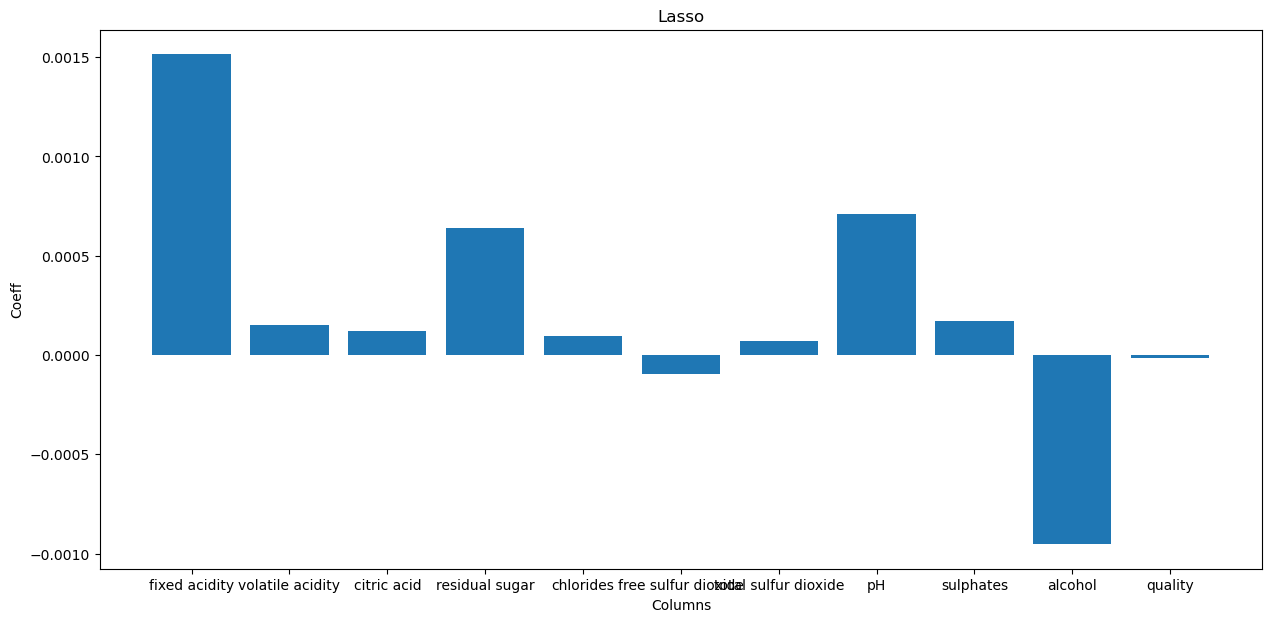

In [83]:
plt.figure(figsize=(15,7))
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.bar(x.columns, la.coef_)
plt.show()

#Ridge

In [88]:
ri =Ridge(alpha=10)
ri.fit(x_train,y_train)

Ridge(alpha=10)

In [90]:
ri.score(x_test,y_test)

0.8322078297002043

In [114]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

6.111023386359634e-07
0.0005889921759620874
0.0007817303490564783


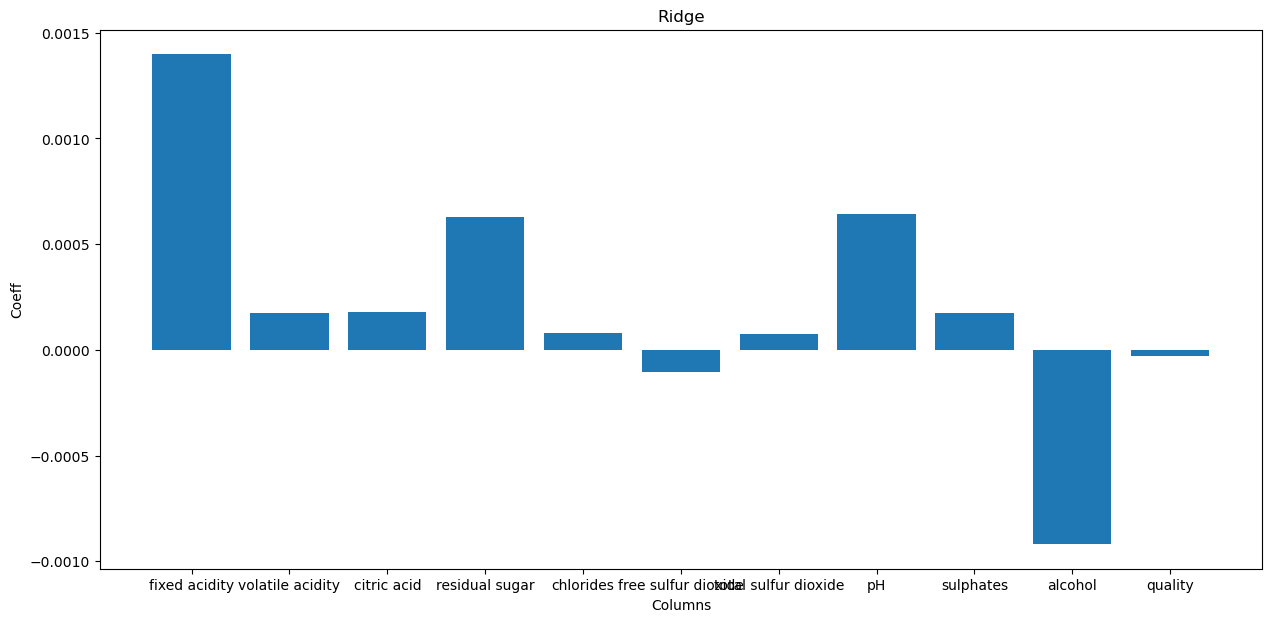

In [92]:
plt.figure(figsize=(15,7))
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.bar(x.columns, ri.coef_)
plt.show()

In [121]:
df = pd.DataFrame(
    {"Col_Name":x.columns ,"Linear Regression":lr.coef_ ,"Lasso": la.coef_ ,"Ridge": ri.coef_ })  

In [123]:
df

,Col_Name,Linear Regression,Lasso,Ridge
0,fixed acidity,0.001551,0.001514,0.001399
1,volatile acidity,0.000162,0.000152,0.000176
2,citric acid,0.000129,0.000121,0.000179
3,residual sugar,0.000649,0.000640,0.000630
4,chlorides,0.000108,0.000094,0.000080
5,free sulfur dioxide,-0.000125,-0.000094,-0.000104
6,total sulfur dioxide,0.000105,0.000073,0.000075
7,pH,0.000759,0.000708,0.000642
8,sulphates,0.000184,0.000173,0.000175
9,alcohol,-0.000961,-0.000952,-0.000919
